## 2D Ising Model
**FIZ371 - Scientific & Technical Computations | 10/06/2020**

**2D Ising Model**
* Introduction
    * Relevance of Ising models
* Ferromagnetic Materials
* Difficulties
* Monte Carlo simulation
    * Metropolis algorithm
* Implementation
* Homework
* Appendix: Evolution of the configuration probabilities for a 2x2 Ising Grid
* External link(s)
  
Dr. Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

# Introduction

The Ising model is the modelling of a network with nodes interacting with each other with respect to some order. Initially developed by Ernst Ising in 1925 to model the phase transition in 1D in order to observe critical variables in action, alas Ising didn't manage to encounter any phase transition and gave up the model, until much later. The model was analytically solved by Lars Onsager in 1944. The 3D version has not yet been solved although there are a couple of claims. 

## Relevance of Ising models
As for the relevance and importance of Ising models, I'm quoting directly from our textbook, [MacKay's "Information Theory, Inference, and Learning Algorithms"](http://www.inference.org.uk/mackay/itprnn/book.html):

Ising models are relevant for three reasons.

Ising models are important first as models of magnetic systems that have a phase transition. The theory of universality in statistical physics shows that all systems with the same dimension (here, two), and the same symmetries, have equivalent critical properties, i.e., the scaling laws shown by their phase transitions are identical. So by studying Ising models we can find out not only about magnetic phase transitions but also about phase transitions in many other systems.

Second, if we generalize the energy function to

$$E(\vec{x};\vec{J},\vec{h}) =-\left[\frac{1}{2}\sum_{m,n}{J_{mn}x_m x_n}+\sum_n{h_n x_n}\right]$$

where the couplings $J_{mn}$ and applied fields $h_n$ are not constant, we obtain a family of models known as 'spin glasses' to physicists, and as 'Hopfield networks' or 'Boltzmann machines' to the neural network community. In some of these models, all spins are declared to be neighbours of each other, in which case physicists call the system an "infinite-range" spin glass, and networks call it a "fully connected" network.

Third, the Ising model is also useful as a statistical model on its own right.

# Ferromagnetic Materials
A ferromagnetic material is a material whose atomic spins align with the applied external magnetic field and even at the lack of an external field, its atoms also tend to align their magnetic moments with that of their neighbours resulting in spin domains:

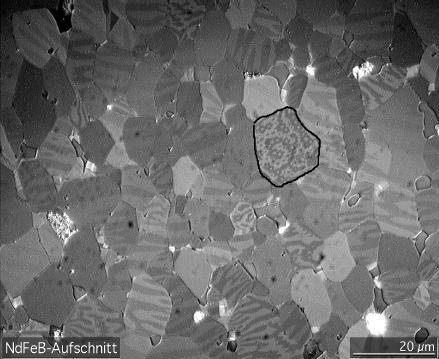
[Source: Wikipedia](https://en.wikipedia.org/wiki/Magnetic_domain)

The magnetic contribution to the energy comes from the following interaction in the Hamiltonian:

$$E(\vec{x};J,H) =-\left[\frac{1}{2}\sum_{m,n}{J_{mn}x_m x_n}+\sum_n{Hx_n}\right]$$

Here, $\vec{x}$ is the spin configuration of the sites; $x_i$ is the spin of the <i>i</i>th site (-1 for "down" and +1 for "up"); $J_{mn}$ is the coupling coefficient between the $m$ and $n$ sites and $H$ is the applied external field, if there is any.

We can define the interaction depth of the spins via the coupling coefficient $J_{mn}$: for example, the coefficient can be 5 for the *nearest neighbours*, 3 for the *next nearest neighbours* and 0 for the rest of the atoms making them irrelevant to the site at hand. J's sign indicates the ferromagnetic/antiferromagnetic tendency, with $J>0$ the spins tend to align in the same direction whereas negative $J$ drives the antiferromagnetic behaviour.

For simplicity, we will assume $J_{mn} = J$ if $m$ and $n$ are neighbours and $J_{mn} = 0$ otherwise, so the only manipulation to the spins will be due to the neighbours.

As we have the energy equation, at equilibrium at temperature $T$, the probability that the state is $\vec{x}$, will be given by:

$$P(\vec{x}|\beta,J,H) = \frac{1}{Z(\beta,J,H)}\exp\left[-\beta E(\vec{x};J,H)\right]$$

here, $\beta=1/k_B T$, $k_B$ is Boltzmann's contant and:

$$Z(\beta,J,H)\equiv\sum_{\vec x}{\exp\left[-\beta E(\vec{x};J,H)\right]}$$

is the partition function. From statistics, we know that the entropy can be written as:

$$S=-\frac{\partial F}{\partial T}$$

where $F$ is the free energy:

$$F=-k_B T\ln Z$$

# Difficulties
So, from the previous section, as we have the probability equation, we can use the partition function $Z$ to first to calculate the free energy and then the entropy of our system. However, there is a very bit tiny problem with the calculation of the partition function. 

Even with a very small system of $10\times10$ grid, where each site can have a sping value of $\pm1$, we will have $2^{100}$ possible configurations ($\{\vec x\}$), which will take more than the age of the universe to calculate on a supercomputer as we know it.

In contrast to this, calculating the energy of any given configuration $\vec{x}$ is pretty much straightforward and fast, so we need to be able to exploit this fact for _sampling_. 

## Monte Carlo simulation

### Metropolis algorithm
We will employ the Metropolis algorithm (which we have already considered as one of the stochastic activation functions of the artificial neural networks) and will randomly choose a site whose spin is in the state $x_n$. If the spin is flipped, the change in the energy will be equal to:

$$\Delta E=2x_n b_n$$

where $b_n$ is the local field, that is:

$$b_n = \sum_{m:(m,n)\in\mathcal{N}}{Jx_m + H}$$

As the Metropolis algorithm proposes, if the energy is decreased, we automatically accept this spin flip; else, we still accept it with a probability of $\exp(-\beta \Delta E)$:

$$P(\text{accept};\Delta E,\beta)=\begin{cases}1&&\Delta E\le0\\\exp(-\beta\Delta E)&&\Delta E\gt0\end{cases}$$

After sufficient number of iterations, this method converges to the equilibrium distribution.

# Implementation
The following code is more suitable for an environment other than Jupyter as it produces many output plots.

[[ 1  1 -1 -1 -1 -1  1 -1  1  1]
 [-1 -1 -1 -1  1  1  1 -1  1  1]
 [-1  1 -1  1 -1  1  1 -1  1 -1]
 [-1 -1 -1 -1 -1 -1 -1  1  1  1]
 [ 1  1 -1  1 -1  1 -1 -1  1 -1]
 [ 1 -1 -1  1 -1 -1 -1  1  1  1]
 [-1  1 -1  1 -1  1  1 -1 -1  1]
 [ 1 -1  1  1  1 -1  1 -1  1  1]
 [-1 -1  1 -1  1  1  1  1 -1 -1]
 [ 1 -1 -1 -1  1 -1 -1  1 -1  1]]
49 up | 51 down 


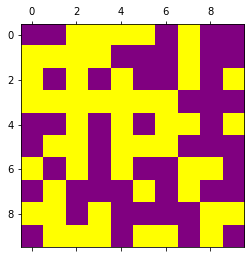

[[ 1  1  1  1 -1  1  1  1  1  1]
 [-1  1  1  1 -1 -1 -1  1 -1 -1]
 [ 1 -1 -1  1 -1  1  1  1 -1 -1]
 [-1 -1 -1  1 -1 -1  1  1 -1  1]
 [ 1  1  1 -1 -1 -1 -1  1  1  1]
 [ 1 -1  1 -1  1 -1 -1  1 -1 -1]
 [-1  1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1  1 -1  1  1 -1  1]
 [-1  1  1 -1 -1 -1 -1  1 -1  1]
 [ 1 -1  1  1  1 -1 -1 -1  1 -1]]
T:10.0	|47 up | 53 down	|Mag: -0.06000 
---------------------------------------------


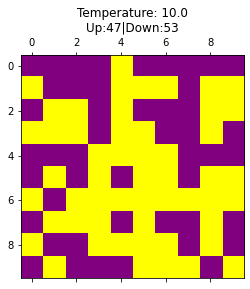

[[ 1 -1 -1 -1 -1 -1 -1  1  1  1]
 [ 1 -1 -1 -1 -1  1  1 -1 -1 -1]
 [-1 -1 -1 -1  1  1 -1 -1  1 -1]
 [ 1 -1  1 -1 -1  1  1  1  1  1]
 [ 1  1 -1  1 -1  1 -1  1  1  1]
 [-1 -1  1  1 -1  1 -1 -1 -1 -1]
 [ 1  1 -1  1  1 -1 -1 -1 -1  1]
 [ 1  1 -1 -1  1 -1  1  1  1 -1]
 [ 1 -1  1 -1 -1 -1  1 -1 -1 -1]
 [ 1 -1  1  1 -1 -1  1  1 -1 -1]]
T:9.5	|46 up | 54 down	|Mag: -0.08000 
---------------------------------------------


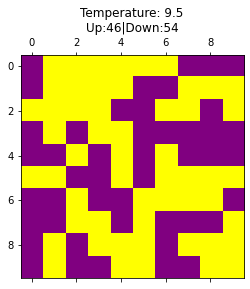

[[ 1 -1  1  1 -1  1  1  1  1 -1]
 [ 1  1 -1  1 -1 -1 -1  1  1 -1]
 [-1  1 -1  1 -1 -1  1 -1  1  1]
 [-1  1  1  1 -1  1  1 -1  1 -1]
 [-1 -1  1 -1  1  1 -1 -1  1  1]
 [ 1 -1 -1 -1  1  1  1  1 -1 -1]
 [ 1 -1 -1  1  1  1  1 -1  1  1]
 [-1 -1  1 -1  1 -1  1 -1 -1  1]
 [-1  1  1 -1 -1 -1 -1 -1  1  1]
 [-1 -1 -1 -1 -1 -1  1  1  1  1]]
T:9.0	|52 up | 48 down	|Mag: 0.04000 
---------------------------------------------


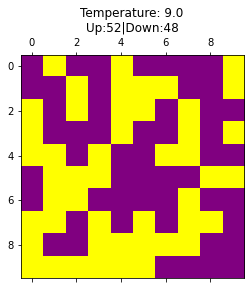

[[-1  1 -1 -1  1 -1  1 -1 -1 -1]
 [-1  1 -1  1 -1  1 -1  1  1  1]
 [-1  1  1  1 -1 -1 -1  1  1  1]
 [-1 -1  1  1  1  1  1 -1 -1 -1]
 [ 1 -1 -1  1  1 -1  1 -1 -1 -1]
 [-1  1  1  1 -1 -1  1 -1 -1 -1]
 [-1 -1  1  1 -1 -1  1 -1 -1 -1]
 [-1  1  1 -1  1  1  1 -1  1  1]
 [ 1 -1  1  1 -1  1 -1 -1  1  1]
 [-1 -1 -1 -1  1 -1 -1 -1 -1  1]]
T:8.5	|46 up | 54 down	|Mag: -0.08000 
---------------------------------------------


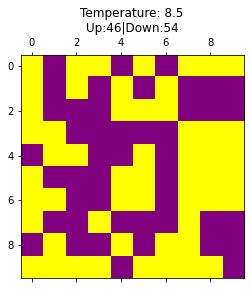

[[ 1 -1  1 -1 -1 -1 -1  1 -1  1]
 [-1 -1 -1 -1 -1  1  1  1  1  1]
 [ 1  1 -1  1 -1  1  1 -1 -1  1]
 [ 1  1  1  1  1  1  1 -1  1  1]
 [-1 -1 -1 -1  1 -1  1 -1 -1 -1]
 [-1 -1 -1  1  1 -1 -1  1 -1 -1]
 [ 1 -1  1 -1  1 -1 -1  1 -1 -1]
 [ 1 -1 -1 -1 -1  1 -1 -1  1 -1]
 [ 1  1 -1 -1  1 -1 -1  1  1 -1]
 [ 1  1 -1 -1 -1  1  1  1  1 -1]]
T:8.0	|47 up | 53 down	|Mag: -0.06000 
---------------------------------------------


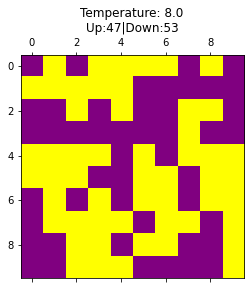

[[ 1 -1 -1 -1 -1  1 -1 -1  1  1]
 [ 1 -1 -1 -1 -1 -1 -1  1  1  1]
 [ 1 -1 -1 -1 -1  1  1  1  1  1]
 [-1  1  1  1  1 -1  1  1 -1  1]
 [-1 -1 -1  1  1 -1 -1  1  1  1]
 [ 1 -1 -1  1 -1 -1 -1 -1  1  1]
 [-1 -1 -1 -1  1  1  1  1  1  1]
 [-1  1  1  1  1 -1  1 -1  1  1]
 [ 1  1 -1 -1 -1  1  1  1  1  1]
 [ 1 -1 -1 -1 -1 -1  1  1 -1  1]]
T:7.5	|54 up | 46 down	|Mag: 0.08000 
---------------------------------------------


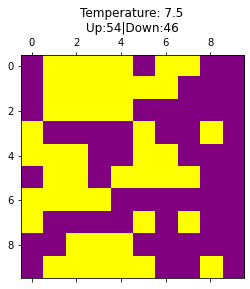

[[ 1  1  1  1  1 -1  1  1  1  1]
 [ 1 -1  1 -1 -1 -1 -1 -1 -1  1]
 [ 1 -1  1 -1 -1  1 -1 -1  1  1]
 [ 1  1  1 -1 -1 -1  1  1  1 -1]
 [ 1 -1  1 -1 -1 -1 -1 -1  1 -1]
 [ 1  1  1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1  1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1  1  1  1 -1 -1  1  1 -1]
 [-1  1 -1 -1  1  1  1  1  1  1]
 [ 1  1  1 -1  1 -1  1  1 -1  1]]
T:7.0	|49 up | 51 down	|Mag: -0.02000 
---------------------------------------------


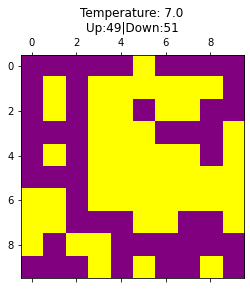

[[-1 -1 -1 -1  1 -1  1 -1 -1 -1]
 [-1 -1 -1 -1  1 -1 -1  1  1 -1]
 [-1 -1 -1  1 -1 -1 -1  1  1 -1]
 [-1 -1 -1 -1  1  1  1  1  1  1]
 [ 1 -1 -1 -1  1  1  1  1 -1  1]
 [-1 -1  1 -1  1  1 -1  1  1  1]
 [ 1  1 -1 -1  1 -1 -1 -1  1  1]
 [ 1 -1  1 -1 -1 -1  1  1  1  1]
 [-1 -1 -1 -1 -1  1 -1  1  1 -1]
 [ 1 -1 -1 -1  1 -1 -1 -1 -1 -1]]
T:6.5	|42 up | 58 down	|Mag: -0.16000 
---------------------------------------------


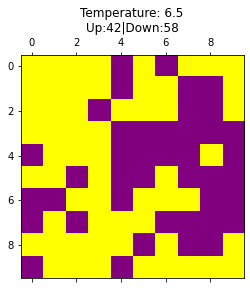

[[-1 -1 -1 -1  1  1 -1 -1  1 -1]
 [ 1  1 -1 -1  1 -1 -1  1  1 -1]
 [ 1  1  1  1  1 -1 -1 -1 -1  1]
 [-1  1  1  1  1 -1 -1 -1 -1  1]
 [ 1  1 -1 -1 -1 -1  1  1  1  1]
 [ 1  1  1 -1 -1 -1 -1  1  1  1]
 [-1 -1  1  1  1 -1 -1 -1  1  1]
 [-1  1  1  1  1 -1  1 -1  1  1]
 [-1  1  1 -1 -1 -1  1  1  1  1]
 [ 1 -1 -1 -1  1  1  1 -1 -1  1]]
T:6.0	|54 up | 46 down	|Mag: 0.08000 
---------------------------------------------


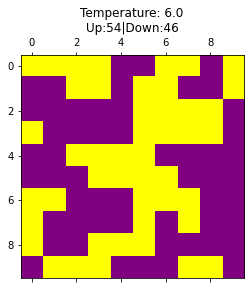

[[ 1  1 -1 -1  1 -1 -1 -1  1  1]
 [ 1  1  1  1 -1 -1 -1 -1  1 -1]
 [ 1 -1 -1  1 -1  1 -1 -1  1  1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1  1]
 [-1  1  1  1 -1  1 -1 -1 -1 -1]
 [-1  1  1  1 -1 -1  1 -1 -1  1]
 [ 1  1  1  1 -1  1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1  1  1  1  1  1]
 [-1 -1 -1 -1 -1 -1 -1 -1  1 -1]
 [ 1  1  1 -1  1  1 -1 -1  1  1]]
T:5.5	|43 up | 57 down	|Mag: -0.14000 
---------------------------------------------


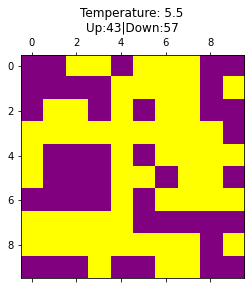

[[ 1  1 -1 -1 -1  1 -1 -1  1 -1]
 [-1 -1 -1  1  1  1 -1  1 -1 -1]
 [ 1  1  1  1  1  1 -1 -1 -1  1]
 [ 1  1  1  1  1  1 -1  1  1  1]
 [ 1 -1 -1 -1 -1 -1 -1  1  1  1]
 [ 1 -1 -1  1 -1 -1  1  1 -1 -1]
 [ 1  1  1  1  1 -1 -1 -1 -1  1]
 [ 1  1 -1 -1  1  1 -1  1 -1 -1]
 [ 1  1 -1  1  1  1  1  1  1 -1]
 [ 1  1 -1  1 -1 -1 -1  1  1  1]]
T:5.0	|57 up | 43 down	|Mag: 0.14000 
---------------------------------------------


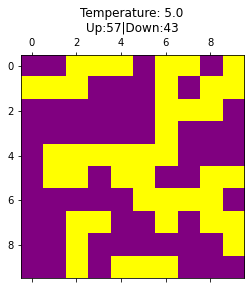

[[-1 -1 -1 -1  1  1  1  1  1  1]
 [-1 -1 -1 -1  1  1 -1 -1 -1  1]
 [-1 -1  1 -1  1  1  1 -1 -1  1]
 [-1  1  1 -1  1  1  1  1 -1  1]
 [ 1 -1 -1 -1 -1  1  1  1 -1 -1]
 [ 1 -1 -1 -1 -1 -1  1 -1 -1  1]
 [ 1  1  1  1  1  1  1 -1 -1  1]
 [ 1  1  1  1  1 -1 -1 -1  1  1]
 [ 1 -1  1  1  1 -1 -1 -1 -1 -1]
 [-1  1 -1  1  1 -1  1  1  1 -1]]
T:4.5	|53 up | 47 down	|Mag: 0.06000 
---------------------------------------------


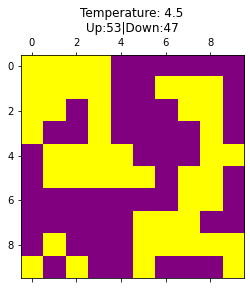

[[ 1  1  1  1  1 -1  1  1 -1  1]
 [ 1  1  1  1  1 -1 -1  1 -1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [-1 -1  1 -1  1  1 -1  1  1  1]
 [ 1  1  1 -1  1  1 -1  1  1  1]
 [-1 -1  1 -1 -1  1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1  1 -1 -1 -1]
 [-1 -1 -1 -1  1  1  1 -1 -1  1]
 [-1 -1 -1 -1  1  1  1 -1 -1 -1]
 [-1  1 -1 -1 -1 -1  1  1 -1 -1]]
T:4.0	|52 up | 48 down	|Mag: 0.04000 
---------------------------------------------


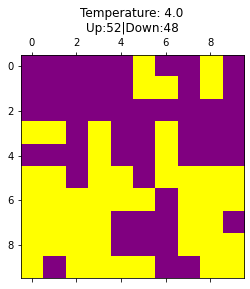

[[ 1 -1  1  1  1  1 -1  1 -1  1]
 [-1 -1  1  1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1  1  1  1 -1  1  1]
 [-1 -1  1  1  1  1  1  1  1 -1]
 [-1 -1 -1 -1  1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1  1 -1 -1 -1 -1 -1]
 [-1  1  1  1  1  1 -1 -1 -1 -1]
 [-1  1  1  1  1  1 -1 -1  1 -1]
 [ 1  1 -1  1  1 -1 -1  1  1  1]
 [ 1  1  1  1  1  1  1 -1 -1  1]]
T:3.5	|50 up | 50 down	|Mag: 0.00000 
---------------------------------------------


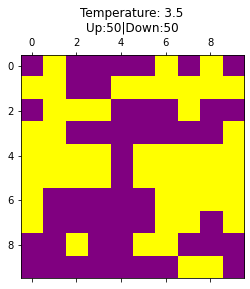

[[ 1 -1 -1 -1 -1 -1 -1  1  1 -1]
 [ 1 -1 -1 -1 -1 -1 -1  1 -1  1]
 [-1 -1 -1 -1 -1 -1 -1  1  1 -1]
 [ 1 -1  1 -1 -1 -1  1  1  1  1]
 [ 1  1  1  1  1  1 -1  1  1 -1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1 -1  1  1  1  1  1  1  1  1]
 [-1 -1  1  1  1 -1  1  1  1  1]
 [-1 -1  1  1  1 -1 -1 -1 -1  1]
 [ 1 -1 -1 -1 -1 -1  1  1  1 -1]]
T:3.0	|56 up | 44 down	|Mag: 0.12000 
---------------------------------------------


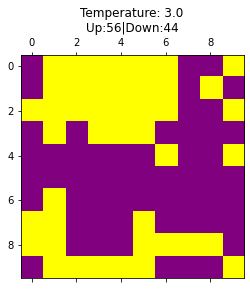

[[ 1  1  1 -1 -1 -1  1  1  1  1]
 [ 1  1  1  1 -1 -1 -1  1  1  1]
 [-1 -1 -1  1 -1 -1 -1  1  1  1]
 [ 1  1  1  1 -1  1  1  1  1  1]
 [ 1  1  1  1 -1  1  1 -1  1  1]
 [ 1  1 -1 -1 -1  1  1  1  1  1]
 [ 1 -1 -1 -1 -1  1 -1  1  1  1]
 [ 1  1  1 -1 -1 -1 -1  1  1  1]
 [ 1  1  1  1 -1 -1 -1  1  1  1]
 [ 1  1  1  1 -1 -1  1  1  1  1]]
T:2.5	|68 up | 32 down	|Mag: 0.36000 
---------------------------------------------


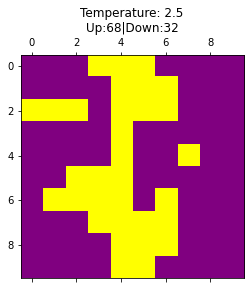

[[ 1  1  1  1  1 -1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [-1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]]
T:2.0	|98 up | 2 down	|Mag: 0.96000 
---------------------------------------------


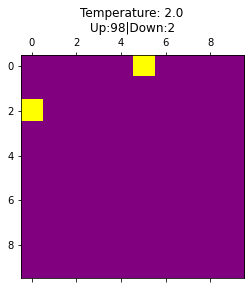

[[ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1 -1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1 -1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]]
T:1.5	|98 up | 2 down	|Mag: 0.96000 
---------------------------------------------


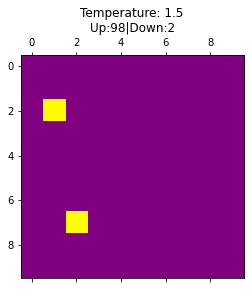

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]
T:1.0	|100 up | 0 down	|Mag: 1.00000 
---------------------------------------------


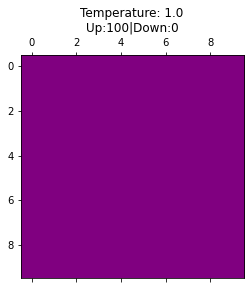

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]
T:0.5	|100 up | 0 down	|Mag: 1.00000 
---------------------------------------------


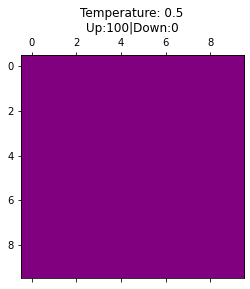

[[10.   -0.06]
 [ 9.5  -0.08]
 [ 9.    0.04]
 [ 8.5  -0.08]
 [ 8.   -0.06]
 [ 7.5   0.08]
 [ 7.   -0.02]
 [ 6.5  -0.16]
 [ 6.    0.08]
 [ 5.5  -0.14]
 [ 5.    0.14]
 [ 4.5   0.06]
 [ 4.    0.04]
 [ 3.5   0.  ]
 [ 3.    0.12]
 [ 2.5   0.36]
 [ 2.    0.96]
 [ 1.5   0.96]
 [ 1.    1.  ]
 [ 0.5   1.  ]]


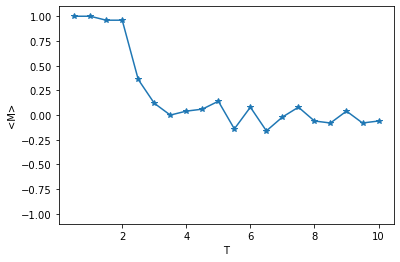

Finished.


In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Implementation of the Metropolis algorithm 
for 2D Ising model evolution.

Written for the FIZ371 Course, 10/06/2020
Dr. Emre S. Tasci <emre.tasci@hacettepe.edu.tr>
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.use('module://backend_interagg') # PyCharm doesn't always display the plots

colors = ['yellow', 'purple', 'orange', 'blue', 'yellow', 'purple']
bounds = [-1,1,2,3,4,5,6]
# Up: Purple | Down: Yellow

cmap = mpl.colors.ListedColormap(colors)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

np.random.seed(371)

N = 10
num_iterations = 10000

H = 0 # External field
k_B = 1 # Boltzmann constant
J = 1 # Coupling coefficient
T0 = 10 # Temperature
beta = 1/(k_B*T0)

# Create our NxN grid, fill with random spin orientation
mapN = np.random.randint(0,2,[N,N])
#mapN = np.ones((N,N))
mapN[mapN==0] = -1
print(mapN)
num_ups = np.sum(np.sum(mapN==1))
num_downs = N**2 - num_ups
print("{:} up | {:} down ".format(num_ups,num_downs))
plt.matshow(mapN, interpolation="none", cmap=cmap, norm=norm)
#plt.savefig("/tmp/figs/" + "TS_%.3fs" % (T0) + ".png")
plt.show()

#input("devam?..")
magnetization_vs_T = np.empty([0,2])

print("="*45)
for T in np.arange(T0,0,-0.5):
    if(T == 0):
        continue
    beta = 1/(k_B*T)
    for step in range(num_iterations):
        # Pick a random site and calculate its local field
        i,j = np.random.randint(0,N,[1,2]).flatten()
        x_n = mapN[i,j]
        b_n = 0
        ## print(i,j)
        # Neighbours
        ip1 = np.mod(i+1,N)
        im1 = np.mod(i-1,N)
        jp1 = np.mod(j+1,N)
        jm1 = np.mod(j-1,N)
        # Left, Right, Below, Above neighbours
        neighbour_positions = np.array([[im1,j],[ip1,j],[i,jm1],[i,jp1]])
        for n_i in range(4):
            m_i,m_j = neighbour_positions[n_i,:].flatten()
            b_n += J*mapN[m_i,m_j]
        b_n += H
        DeltaE=2*x_n*b_n
        if(DeltaE<=0):
            mapN[i,j] *= -1
        elif(np.random.rand()<np.exp(-beta*DeltaE)):
            mapN[i,j] *= -1
        ##print("-"*45)
    print(mapN)
    num_ups = np.sum(np.sum(mapN==1))
    num_downs = N**2 - num_ups
    magnetization = (num_ups-num_downs)/N**2
    magnetization_vs_T = np.vstack((magnetization_vs_T,[T,magnetization]))
    print("T:{:}\t|{:} up | {:} down\t|Mag: {:.5f} ".format(T,num_ups,num_downs,magnetization))
    print("-"*45)
    plt.matshow(mapN, interpolation="none", cmap=cmap, norm=norm,origin="upper")
    plt.title("Temperature: {:}\nUp:{:d}|Down:{:d}".format(T,num_ups,num_downs))
    #plt.savefig("/tmp/figs/" + "T_%.3f" % (T) + ".png")
    plt.show()
print(magnetization_vs_T)
plt.plot(magnetization_vs_T[:,0],magnetization_vs_T[:,1],"*-")
plt.ylim(-1.1,1.1)
plt.xlabel("T")
plt.ylabel("<M>")
#plt.savefig("/tmp/figs/" + "MeanMag" + ".png")
plt.show()
print("Finished.")

# Homework
Show that a flip of the spin $x_n$ of site $n$ indeed changes the energy by:

$$\Delta E=2x_n b_n$$

where $b_n$ is the local field defined as:

$$b_n = \sum_{m:(m,n)\in\mathcal{N}}{Jx_m + H}$$

# Appendix : Evolution of the configuration probabilities for a 2x2 Ising Grid
A 2x2 grid system can be in one of the $2^4=16$ configurations:

| A |(x1)               |\| | B |(x4)               |\| | C |(x6)               |\| | D |(x4)               |\| | E |(x1)               |
|:-------:|-------------| |:-------:|-------------||:-------:|-------------||:-------:|-------------||:-------:|-------------|
| &uarr;      | &uarr;  |\|  | &darr;      | &uarr;  |\| | &uarr;      | &uarr;  |\| | &uarr;      | &darr;  |\| | &darr;      | &darr;  |
| &uarr;       | &uarr; |\|  | &uarr;       | &uarr; |\| | &darr;       | &darr; |\| | &darr;       | &darr; |\| | &darr;       | &darr; |

The calculated energies with respect to each spin's interaction with its neighbours yields (taking $J=1,\,H=0$):

$$E_A = -\tfrac{1}{2}\left[\left(1.1+1.1+1.1\right)+\left(1.1+1.1+1.1\right)+
\left(1.1+1.1+1.1\right)+\left(1.1+1.1+1.1\right)\right]=-6$$
$$E_B = -\tfrac{1}{2}\left[\left(-1.1+-1.1+-1.1\right)+\left(1.-1+1.1+1.1\right)+
\left(1.-1+1.1+1.1\right)+\left(1.-1+1.1+1.1\right)\right]=0$$
$$E_C = -\tfrac{1}{2}\left[\left(1.1+1.-1+1.-1\right)+\left(1.1+1.-1+1.-1\right)+
\left(-1.1+-1.1+-1.-1\right)+\left(-1.1+-1.1+-1.-1\right)\right]=2$$
$$E_D = E_B = -\tfrac{1}{2}\left[\left(1.-1+1.-1+1.-1\right)+\left(-1.1+-1.-1+-1.-1\right)+
\left(-1.1+-1.-1+-1.-1\right)+\left(-1.1+-1.-1+-1.-1\right)\right]=0$$
$$E_E = E_A = -\tfrac{1}{2}\left[\left(-1.-1+-1.-1+-1.-1\right)+\left(-1.-1+-1.-1+-1.-1\right)+
\left(-1.-1+-1.-1+-1.-1\right)+\left(-1.-1+-1.-1+-1.-1\right)\right]=-6$$


Let's proceed by calculating the probabilites at a given temperature $T$ (with $k_B$ taken as $1$):

In [2]:
import numpy as np

k_B = 1

E = np.array([-6,0,2,0,-6])
multiplicity = np.array([1,4,6,4,1])

results = []
for T in np.concatenate((np.arange(300,10,-1),np.arange(10,0,-0.5))):
    Probabilities = multiplicity*np.exp(-E/(k_B*T))
    Z = Probabilities.sum()
    Probabilities /= Z
    print(T,Probabilities)
    results.append([T,*Probabilities])
results = np.array(results)

300.0 [0.06376045 0.24999163 0.37249584 0.24999163 0.06376045]
299.0 [0.0637647  0.24999157 0.37248745 0.24999157 0.0637647 ]
298.0 [0.06376898 0.24999152 0.37247901 0.24999152 0.06376898]
297.0 [0.06377329 0.24999146 0.37247051 0.24999146 0.06377329]
296.0 [0.06377763 0.2499914  0.37246195 0.2499914  0.06377763]
295.0 [0.06378199 0.24999134 0.37245333 0.24999134 0.06378199]
294.0 [0.06378639 0.24999128 0.37244465 0.24999128 0.06378639]
293.0 [0.06379082 0.24999122 0.37243592 0.24999122 0.06379082]
292.0 [0.06379528 0.24999116 0.37242712 0.24999116 0.06379528]
291.0 [0.06379977 0.2499911  0.37241826 0.2499911  0.06379977]
290.0 [0.06380429 0.24999104 0.37240934 0.24999104 0.06380429]
289.0 [0.06380884 0.24999098 0.37240037 0.24999098 0.06380884]
288.0 [0.06381342 0.24999092 0.37239132 0.24999092 0.06381342]
287.0 [0.06381804 0.24999085 0.37238222 0.24999085 0.06381804]
286.0 [0.06382269 0.24999079 0.37237305 0.24999079 0.06382269]
285.0 [0.06382737 0.24999072 0.37236382 0.24999072 0.06

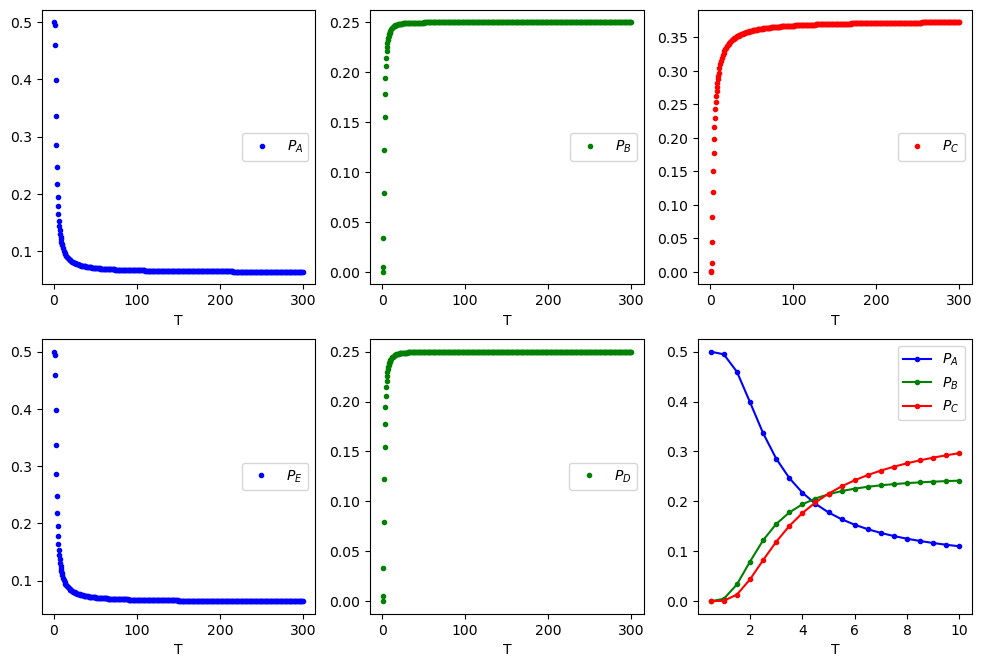

In [3]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

plt.subplot(2,3,1)
plt.plot(results[:,0],results[:,1],".b")
plt.legend(["$P_A$"],loc="right")
plt.xlabel("T")

plt.subplot(2,3,2)
plt.plot(results[:,0],results[:,2],".g")
plt.legend(["$P_B$"],loc="right")
plt.xlabel("T")

plt.subplot(2,3,3)
plt.plot(results[:,0],results[:,3],".r")
plt.legend(["$P_C$"],loc="right")
plt.xlabel("T")

plt.subplot(2,3,5)
plt.plot(results[:,0],results[:,4],".g")
plt.legend(["$P_D$"],loc="right")
plt.xlabel("T")

plt.subplot(2,3,4)
plt.plot(results[:,0],results[:,5],".b")
plt.legend(["$P_E$"],loc="right")
plt.xlabel("T")

plt.subplot(2,3,6)
plt.plot(results[-20:,0],results[-20:,1],".-b")
plt.plot(results[-20:,0],results[-20:,2],".-g")
plt.plot(results[-20:,0],results[-20:,3],".-r")
plt.legend(["$P_A$","$P_B$","$P_C$"])
plt.xlabel("T")

plt.show()

# External link(s)
* Dr. David Boyce - Magnetic ordering https://twitter.com/DrDavidBoyce/status/1176921195507310593
* Marco Koschny - Magnetic Domain Movement and Wall Motion ([1](https://www.youtube.com/watch?v=HzxTqQ40wSU), [2](https://www.youtube.com/watch?v=LFC6tbbMUaA))
* Andrea Benassi - [Labyrinthine magnetic domains (small stray field)](https://www.youtube.com/watch?v=A5NmVqNSIqw)